Low frequency stochastic errors can be included in the Hamiltonian as
$$
H(t) = (z(t)-\tilde{z})\sigma_z+(x+\tilde{x})\sigma_x,
$$
with $\tilde{z}$ and $\tilde{x}$ drawn from a Gaussian distribution, with zero mean and standard deviation given by $\delta_z$ and $\delta_x$, respectively.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from HQUAD_lib.QUAD_utils import solve_LZ
from HQUAD_lib.parallel_utils import parameter_run
from HQUAD_lib.physics_utils import fidelity_LZ

In [2]:
x = 1
delta_x = x / 10
delta_z = x / 10

alphas = np.linspace(-2, 10, 10)  # Increase number of samples to improve resolution
betas = alphas
n_plus = (alphas + betas) / 2

tfs = np.linspace(0.1, 30, 10)  # Increase number of samples to improve resolution

n_runs = 5  # Increase number of runs to get more stable results

In [3]:
def compute_fidelity_total(alpha, beta, delta_x, delta_z):
    z_sol = solve_LZ(alpha, beta, x=x)

    if (delta_x == 0) and (delta_z == 0):
        n_runs_int = 1
    else:
        n_runs_int = n_runs
  
    fidelities = []
    for _ in tqdm(range(n_runs_int), desc='    Iterating over noise', leave=False):
        x_bar = np.random.normal(scale=delta_x)
        z_bar = np.random.normal(scale=delta_z)
        
        fidelities.append(parameter_run(fidelity_LZ, 'tf', tfs, pulse=z_sol, x=x, z0=-10, x_bar=x_bar, z_bar=z_bar, pbar_bool=False))

    fidelities = np.array(fidelities)
    
    return np.average(fidelities, axis=0)

In [4]:
fidelities = np.zeros((len(alphas), len(tfs)))
fidelities_x = np.zeros((len(alphas), len(tfs)))
fidelities_z = np.zeros((len(alphas), len(tfs)))

pbar = tqdm(range(len(alphas)), 'Iterating over alpha')
for i in pbar:
    fidelities[i] = compute_fidelity_total(alphas[i], betas[i], 0, 0)
    fidelities_x[i] = compute_fidelity_total(alphas[i], betas[i], delta_x, 0)
    fidelities_z[i] = compute_fidelity_total(alphas[i], betas[i], 0, delta_z)

Iterating over alpha:   0%|          | 0/10 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

    Iterating over noise:   0%|          | 0/5 [00:00<?, ?it/s]

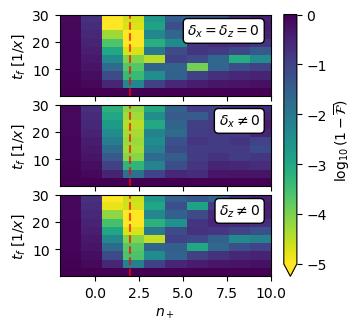

In [6]:
fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(3.4, 3.4))

vmax = 0
vmin = -5

axs[0].imshow(np.log10(1 - fidelities).T, aspect='auto', origin='lower', interpolation='none', vmin=vmin, vmax=vmax,
              extent=[min(n_plus), max(n_plus), min(tfs), max(tfs)], cmap='viridis_r')

axs[1].imshow(np.log10(1 - fidelities_x).T, aspect='auto', origin='lower', interpolation='none', vmin=vmin, vmax=vmax,
              extent=[min(n_plus), max(n_plus), min(tfs), max(tfs)], cmap='viridis_r')

im = axs[2].imshow(np.log10(1 - fidelities_z).T, aspect='auto', origin='lower', interpolation='none', vmin=vmin, vmax=vmax,
                   extent=[min(n_plus), max(n_plus), min(tfs), max(tfs)], cmap='viridis_r')

axs[0].text(0.95, 0.9, r'$\delta_x=\delta_z = 0$', ha='right',
            transform=axs[0].transAxes, va='top',
            bbox=dict(boxstyle="round", ec='k', fc='w', alpha=1))

axs[1].text(0.95, 0.9, r'$\delta_x \neq 0$', ha='right',
            transform=axs[1].transAxes, va='top',
            bbox=dict(boxstyle="round", ec='k', fc='w', alpha=1))

axs[2].text(0.95, 0.9, r'$\delta_z \neq 0$', ha='right',
            transform=axs[2].transAxes, va='top',
            bbox=dict(boxstyle="round", ec='k', fc='w', alpha=1))

for ax in axs:
    ax.set_ylabel(r'$t_f \; [1 / x]$')
    ax.axvline(2, color='r', ls='--', alpha=0.7)

axs[2].set_xlabel(r'$n_+$')
axs[2].set_ylim(min(tfs), 30)

fig.subplots_adjust(hspace=0.1)
fig.colorbar(im, ax=axs, label=r'$\log_{10}(1 - \overline{\mathcal{F}})$', extend='min');